## Modele Machine Learning

### 1. Regresja liniowa

In [3]:
### Importowanie bibliotek

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression #pip install scikit-learn

In [4]:
### Wczytanie danych

df = pd.read_csv('example1.csv',sep=';',decimal=',')

print(df.head())
print(df.shape)

# X = []
# for i in df['X']:
#     X.append([i])
# Y = list(df['Y'])


X = np.single(df['x'])
y = np.single(df['y'])

   x    y
0  0   -1
1  1  1.2
2  2  2.5
3  3  3.1
4  4  4.3
(11, 2)


[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]] [-1.   1.2  2.5  3.1  4.3  5.1  6.7  7.1  9.4 12.  13. ]


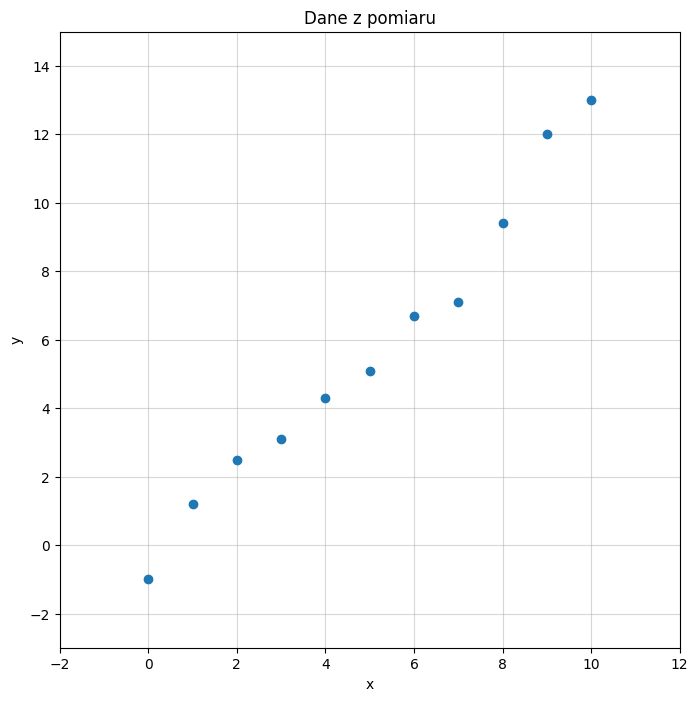

In [5]:
X.shape = (-1,1) # odwracanie wektora X (zmiana wymiarów z poziomego na pionowy)

print(X,y)

plt.figure(figsize=[8,8], facecolor="white")

plt.title("Dane z pomiaru")
plt.xlabel('x')
plt.ylabel("y")
plt.axis([X.min()-2,X.max()+2,y.min()-2,y.max()+2])
plt.grid(True,which="both",axis="both",alpha=.5)
plt.plot(X,y,'o')
plt.show()

[1.311818]
-0.79545355
Wynikiem jest prosta o równaniu y = 1.312 x -0.795
Wynik dopasowania: 97.55%


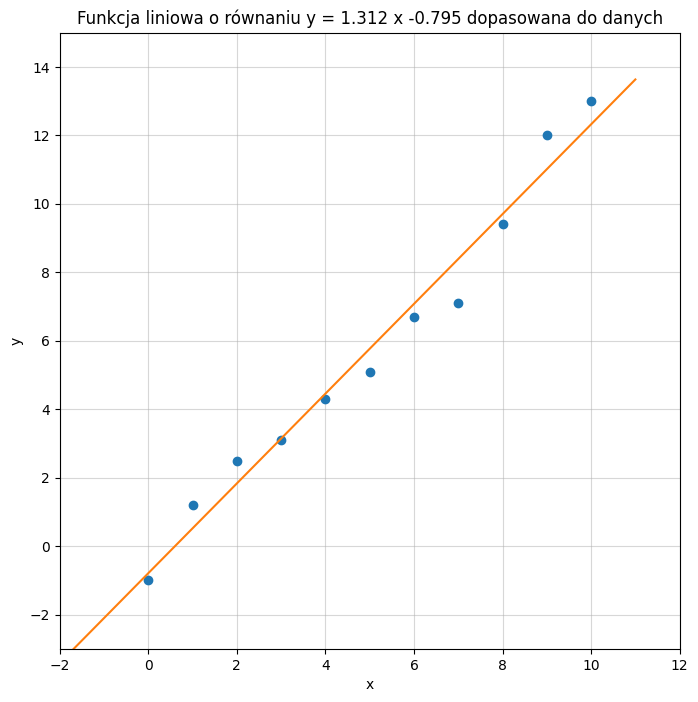

In [7]:
model = LinearRegression().fit(X,y)

print(model.coef_)
print(model.intercept_)
a = model.coef_[0]
b = model.intercept_

print(f"Wynikiem jest prosta o równaniu y = {a:.3f} x {b:+.3f}")

# X = np.arange(-10,10) #
x_test = np.single(range(int(X.min())-2,int(X.max())+2))
x_test.shape = (-1,1)

y_predict = model.predict(x_test)
print(f"Wynik dopasowania: {100*model.score(X,y):.2f}%")

plt.figure(figsize=[8,8], facecolor="white")
plt.title(f'Funkcja liniowa o równaniu y = {a:.3f} x {b:+.3f} dopasowana do danych')

plt.xlabel('x')
plt.ylabel("y")
plt.axis([X.min()-2,X.max()+2,y.min()-2,y.max()+2])
plt.grid(True,which="both",axis="both",alpha=.5)
plt.plot(X,y,'o')
plt.plot(x_test,y_predict,'-')
plt.show()

In [8]:
### Importowanie bibliotek

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## 2. Regresja wielomianowa

Regresja wielomianowa to rozszerzenie regresji liniowej, które pozwala na dopasowanie krzywych. Dzięki temu można modelować bardziej złożone, nieliniowe zależności.
W praktyce:
- Regresja liniowa jest prostsza, szybsza i mniej podatna na nadmierne dopasowanie.
- Regresja wielomianowa lepiej radzi sobie z zakrzywionymi trendami, ale łatwiej się przeucza – dlatego często łączy się ją z regularyzacją.


          x           y
0  0.709097   -2.037914
1 -0.670961    8.435518
2 -9.898163  160.838122
3 -0.298403   11.536360
4 -7.837417  115.868324
(250, 2)
Wynik dopasowania: 96.70%
[0.         0.00582349 1.4814737 ] 12.459347


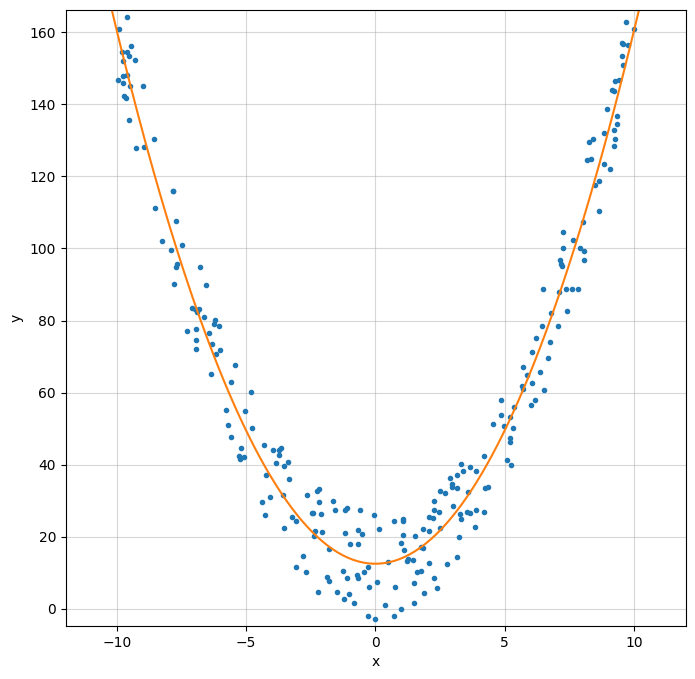

In [17]:
df = pd.read_csv("example2.csv",delimiter=";", decimal=",")

print(df.head())
print(df.shape)

X = np.single(df['x'])
X.shape = (-1,1)
Y = np.single(df['y'])

# plt.figure(figsize=[8,8], facecolor="white")
# plt.title("Dane z importu")

# plt.xlabel('x')
# plt.ylabel("y")
# plt.axis([X.min()-2,X.max()+2,Y.min()-2,Y.max()+2])
# plt.grid(True,which="both",axis="both",alpha=.5)
# plt.plot(X,Y,'.')
# plt.show()

pf = PolynomialFeatures(2)
x_trans = pf.fit_transform(X)

model = LinearRegression().fit(x_trans,Y)

print(f"Wynik dopasowania: {100*model.score(x_trans,Y):.2f}%")
print(model.coef_, model.intercept_)

x_test = np.arange(X.min()-2,X.max()+2,0.1)
x_test.shape = (-1,1)

plt.figure(figsize=[8,8], facecolor="white")
plt.plot(X,Y,'.')
plt.plot(x_test,model.predict(pf.fit_transform(x_test)),'-')
plt.xlabel('x')
plt.ylabel("y")
plt.axis([X.min()-2,X.max()+2,Y.min()-2,Y.max()+2])
plt.grid(True,which="both",axis="both",alpha=.5)
plt.show()

Wynik dopasowania do danych treningowych: 0.21%
Wynik dopasowania do danych testowych: -0.37%
Wynik dopasowania do wszystkich danych: -0.09%
[0.     0.3725] 62.39078


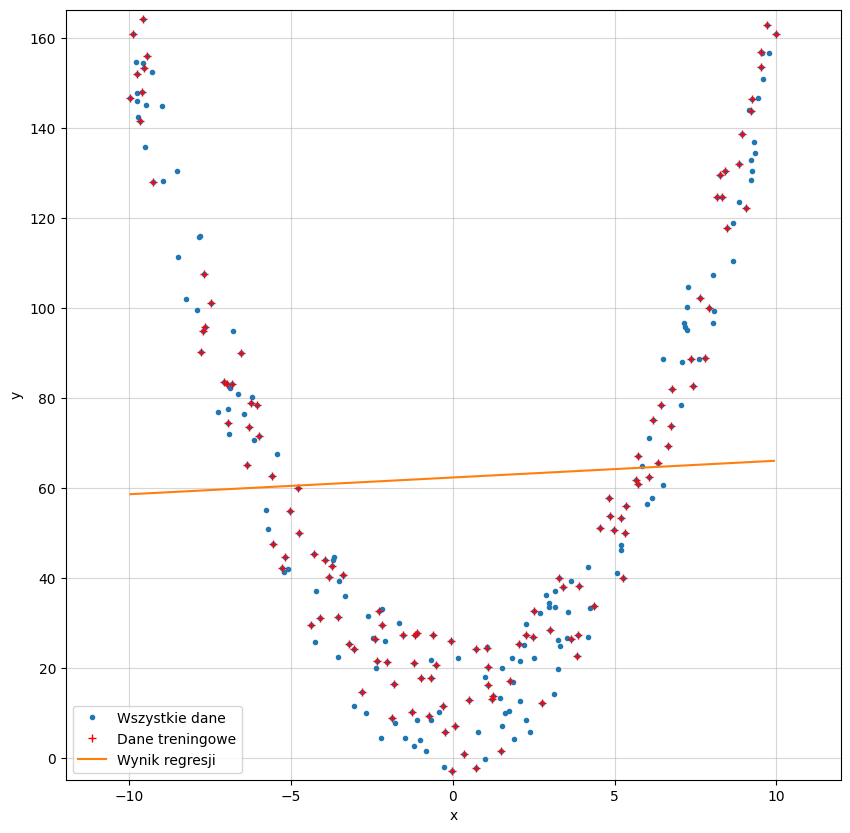

In [15]:
from sklearn.model_selection import train_test_split
# Podział na zestaw treningowy (70%) i testowy (30%)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5) #, random_state=12

pf = PolynomialFeatures(1)
x_train_trans = pf.fit_transform(X_train)
x_test_trans = pf.fit_transform(X_test)
x_trans = pf.transform(X)

model = LinearRegression().fit(x_train_trans,y_train)

print(f"Wynik dopasowania do danych treningowych: {100*model.score(x_train_trans,y_train):.2f}%")
print(f"Wynik dopasowania do danych testowych: {100*model.score(x_test_trans,y_test):.2f}%")
print(f"Wynik dopasowania do wszystkich danych: {100*model.score(x_trans,Y):.2f}%")



print(model.coef_, model.intercept_)

x_test = np.arange(X.min(),X.max(),0.1)
x_test.shape = (-1,1)

plt.figure(figsize=[10,10], facecolor="white")
plt.plot(X,Y,'.')
plt.plot(X_train,y_train,'r+')
plt.plot(x_test,model.predict(pf.fit_transform(x_test)),'-')
plt.legend(["Wszystkie dane","Dane treningowe","Wynik regresji"])
plt.xlabel('x')
plt.ylabel("y")
plt.axis([X.min()-2,X.max()+2,Y.min()-2,Y.max()+2])
plt.grid(True,which="both",axis="both",alpha=.5)
plt.show()